Erste 5 Zeilen:
   anr       datum                                       titel_kurz_d  \
0  1.0  12.09.1848  Bundesverfassung der schweizerischen Eidgenoss...   
1  2.0  14.01.1866                                   Mass und Gewicht   
2  3.0  14.01.1866  Gleichstellung der Juden und Naturalisierten m...   
3  4.0  14.01.1866  Stimmrecht der Niedergelassenen in Gemeindeang...   
4  5.0  14.01.1866  Besteuerung und zivilrechtliche Verhältnisse d...   

                                        titel_kurz_f  \
0   Constitution fédérale de la Confédération suisse   
1                                   Poids et mesures   
2                                  Egalité des Juifs   
3  Droit de vote des Suisses établis, en matière ...   
4      Impôts et rapports civils des Suisses établis   

                                        titel_kurz_e  \
0    Federal Constitution of the Swiss Confederation   
1                               Weights and measures   
2  Equal rights for Jews and naturalised

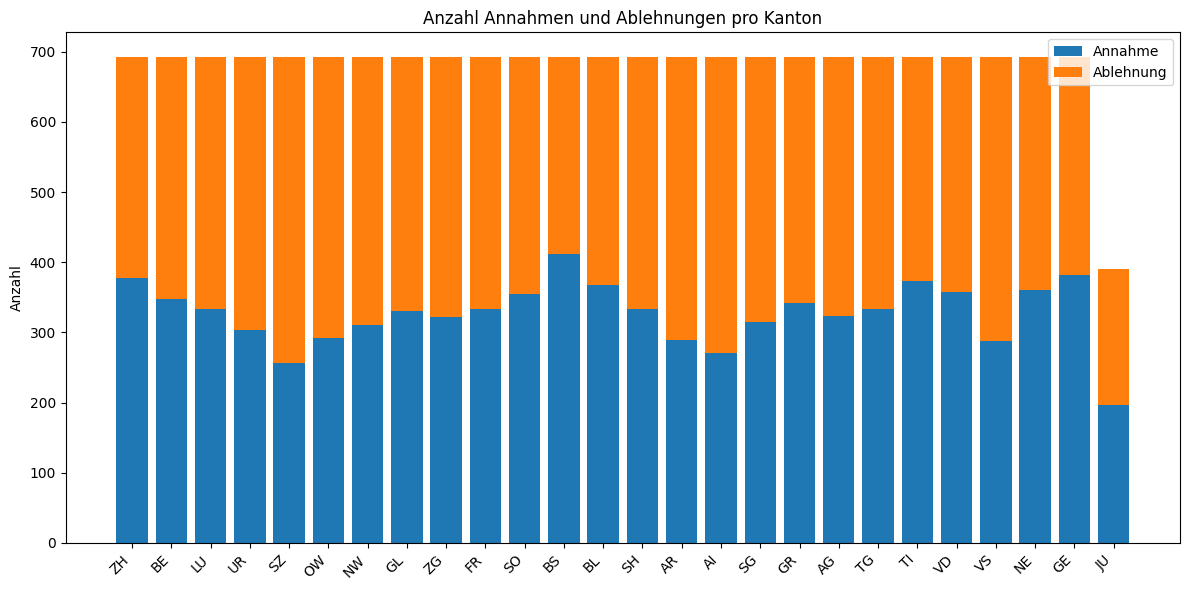

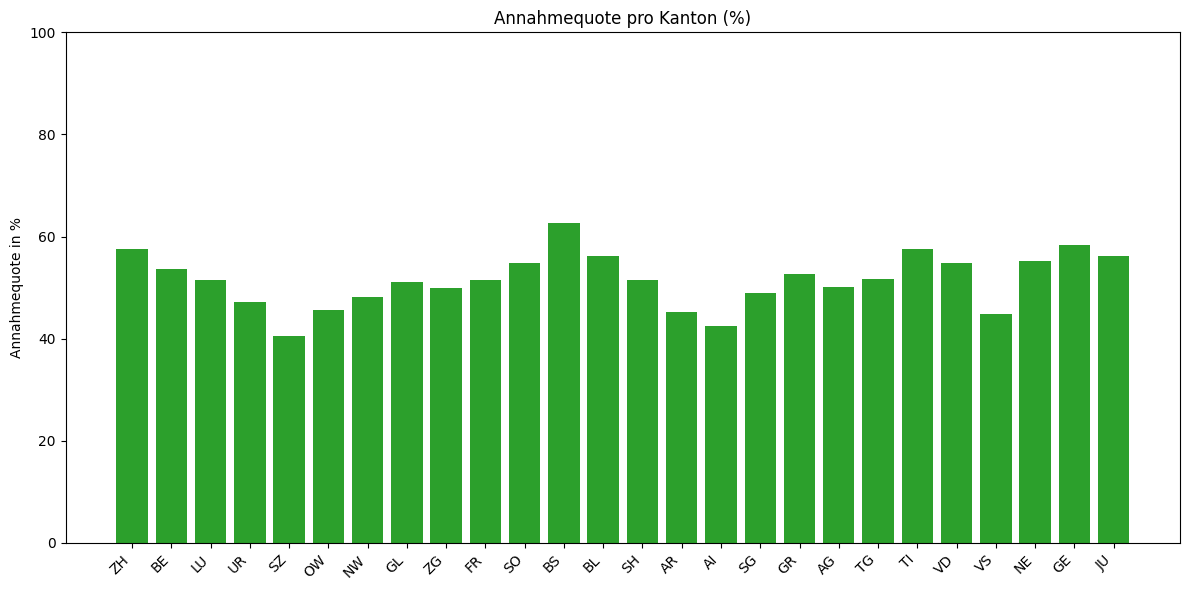

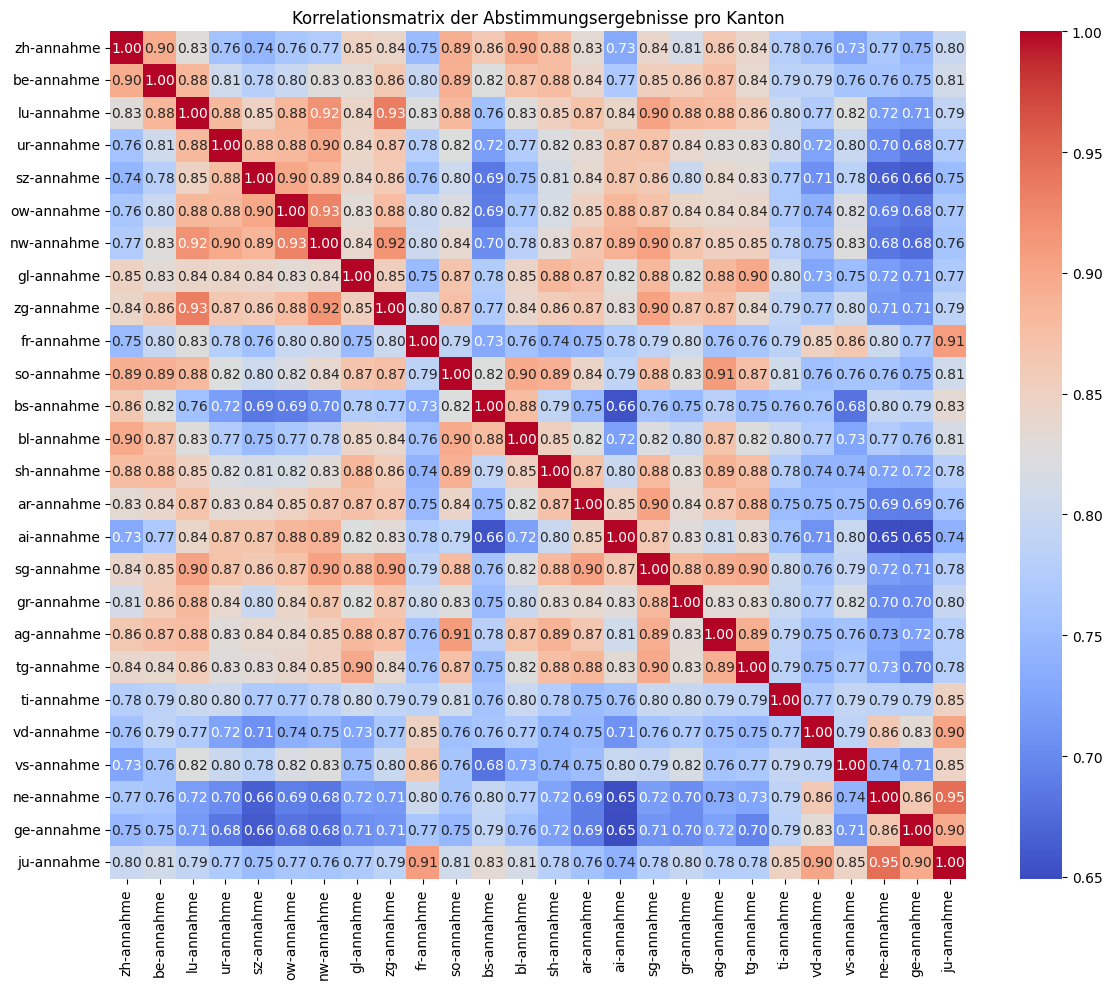

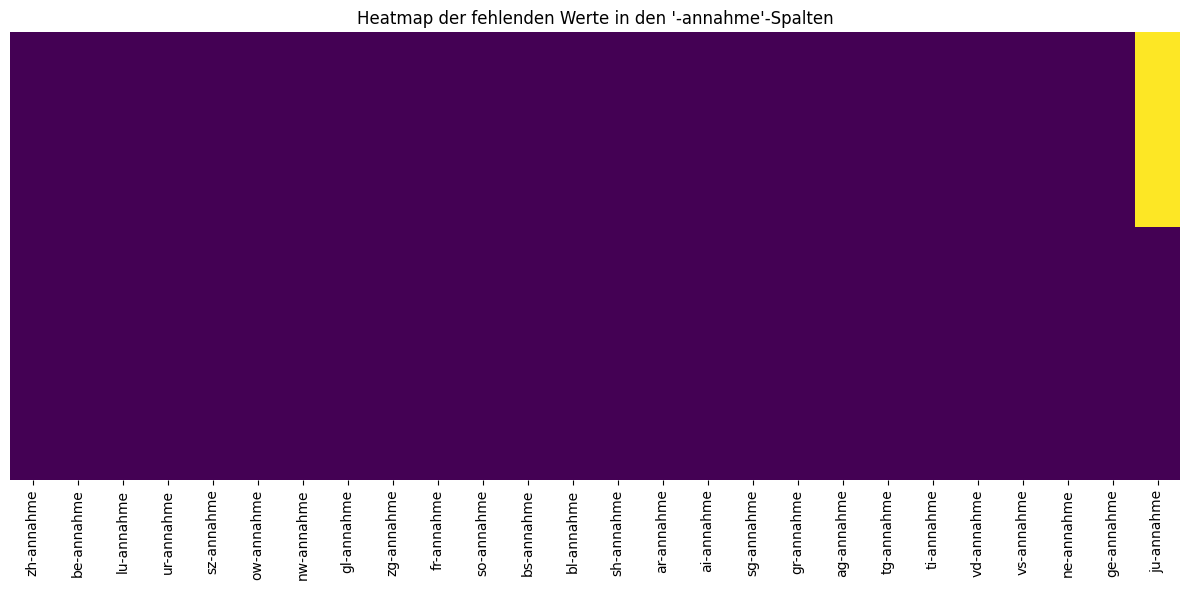

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -------------------------------
# 1. Daten einlesen und erste Analyse
# -------------------------------
# CSV-Datei einlesen – wir gehen davon aus, dass der Trenner ein Semikolon ist.
df = pd.read_csv('Data/dataset.csv', delimiter=";", encoding="utf-8")

# Erste Zeilen, Struktur und deskriptive Statistik anzeigen
print("Erste 5 Zeilen:")
print(df.head())
print("\nInfo zum DataFrame:")
df.info()
print("\nDeskriptive Statistik:")
print(df.describe())

# -------------------------------
# 2. Filtern und Bereinigen der Daten
# -------------------------------
# Wähle nur Spalten, die "-annahme" im Namen enthalten (diese Spalten beinhalten den Abstimmungsausgang pro Kanton)
df_filtered = df[[col for col in df.columns if '-annahme' in col]]

# Ersetze problematische Zeichen:
# - '.' und 'z' werden zu NaN (fehlende Werte)
# - '1' wird zu 1 (Annahme)
# - '0' wird zu 0 (Ablehnung)
df_filtered = df_filtered.replace({'.': np.nan, 'z': np.nan, '1': 1, '0': 0})
# Alle Werte in numerisches Format umwandeln; nicht-konvertierbare werden zu NaN
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# -------------------------------
# 3. Visualisierungen: Gestapeltes Balkendiagramm
# -------------------------------
# Berechne für jede Kantonsspalte:
# - Anzahl Annahmen (Wert == 1)
# - Anzahl Ablehnungen (Wert == 0)
acceptance_counts = (df_filtered == 1).sum()
rejected_counts = (df_filtered == 0).sum()

# Da die Spaltennamen so wie "zh-annahme" sind, können wir diese umformatieren.
# Ersetze "-annahme" durch den Kanton in Großbuchstaben.
canton_names = acceptance_counts.index.str.replace("-annahme", "", regex=False).str.upper()

# Erstelle ein gestapeltes Balkendiagramm
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(canton_names, acceptance_counts.values, label='Annahme', color='tab:blue')
ax.bar(canton_names, rejected_counts.values, bottom=acceptance_counts.values, label='Ablehnung', color='tab:orange')

plt.xticks(rotation=45, ha='right')
plt.title('Anzahl Annahmen und Ablehnungen pro Kanton')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Erweiterte Analyse: Annahmequote pro Kanton
# -------------------------------
# Berechne pro Kanton die Annahmequote (Mittelwert über alle Beobachtungen, ignoriert NaN)
acceptance_rate = df_filtered.mean()

# Visualisiere die Annahmequote als Balkendiagramm (in Prozent)
fig, ax = plt.subplots(figsize=(12, 6))
# Umrechnung in Prozent
ax.bar(canton_names, acceptance_rate.values * 100, color='tab:green')
plt.xticks(rotation=45, ha='right')
plt.title('Annahmequote pro Kanton (%)')
plt.ylabel('Annahmequote in %')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Erweiterte Analyse: Korrelationsmatrix zwischen Kantonen
# -------------------------------
# Da die Werte binär sind, kann eine Korrelationsmatrix Aufschluss darüber geben, ob Kantone tendenziell ähnlich abstimmen.
corr_matrix = df_filtered.corr()

# Visualisierung der Korrelationsmatrix als Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Abstimmungsergebnisse pro Kanton")
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Erweiterte Analyse: Missing-Values-Heatmap
# -------------------------------
# Zeige den Anteil fehlender Werte in den gefilterten Spalten
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtered.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Heatmap der fehlenden Werte in den '-annahme'-Spalten")
plt.tight_layout()
plt.show()